<a href="https://colab.research.google.com/github/Rummeysa/urbansoundsclassificaiton/blob/main/veri-onisleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/AI_isleri/spectrograms"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 10 directories and 0 images in /content/drive/MyDrive/AI_isleri/spectrograms
There are 0 directories and 374 images in /content/drive/MyDrive/AI_isleri/spectrograms/6
There are 0 directories and 1000 images in /content/drive/MyDrive/AI_isleri/spectrograms/5
There are 0 directories and 1000 images in /content/drive/MyDrive/AI_isleri/spectrograms/2
There are 0 directories and 429 images in /content/drive/MyDrive/AI_isleri/spectrograms/1
There are 0 directories and 1000 images in /content/drive/MyDrive/AI_isleri/spectrograms/3
There are 0 directories and 929 images in /content/drive/MyDrive/AI_isleri/spectrograms/8
There are 0 directories and 1000 images in /content/drive/MyDrive/AI_isleri/spectrograms/9
There are 0 directories and 1000 images in /content/drive/MyDrive/AI_isleri/spectrograms/0
There are 0 directories and 1000 images in /content/drive/MyDrive/AI_isleri/spectrograms/4
There are 0 directories and 1000 images in /content/drive/MyDrive/AI_isleri/spectrograms/7


In [ ]:
groups = len(os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms"))
groups

10

In [ ]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/content/drive/MyDrive/AI_isleri/spectrograms")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  
print(class_names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

 
  random_image = random.sample(os.listdir(target_folder), 1)

  
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (374, 500, 4)


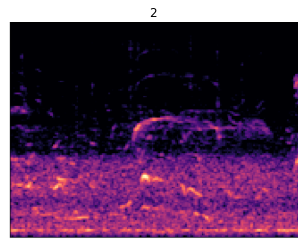

In [ ]:
img = view_random_image(target_dir = "/content/drive/MyDrive/AI_isleri/spectrograms/",
                        target_class = "2") 

In [ ]:
import tensorflow as tf
img.shape

(374, 500, 4)

Image shape: (374, 500, 4)
Image shape: (374, 500, 4)
Image shape: (374, 500, 4)


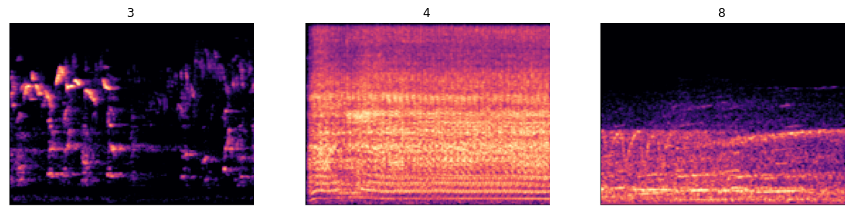

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("/content/drive/MyDrive/AI_isleri/spectrograms/", "3")
plt.subplot(1,3,2)
pizza_image = view_random_image("/content/drive/MyDrive/AI_isleri/spectrograms/", "4")
plt.subplot(1,3,3)
pizza_image = view_random_image("/content/drive/MyDrive/AI_isleri/spectrograms/", "8")

In [ ]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy ,Pandas and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import openCV
import cv2

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder,minmax_scale
from sklearn.model_selection import train_test_split

In [ ]:
data_frame = pd.read_csv("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/metadatas/UrbanSound8K.csv")

In [ ]:
print(type(data_frame))
print(data_frame.shape)

<class 'pandas.core.frame.DataFrame'>
(8732, 8)


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [ ]:
data_frame.shape

(8732, 8)

In [ ]:
data_frame.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
data_frame.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


In [ ]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
from pathlib import Path
import os.path

In [ ]:
air_conditioners = os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/0/")
car_horns = os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/1/")
children_playings = os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/2/")
dog_barks = os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/3/")
drillings = os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/4/")
engine_idlings =os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/5/")
gun_shots = os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/6/")
jackhammers = os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/7/")
sirens = os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/8/")
street_musics = os.listdir("/content/drive/MyDrive/AI_isleri/spectrograms/9/")

air_cond_del = []
car_horn_del =[]
children_play_del = []
dog_bark_del=[]
drillin_del=[]
engine_idlin_del=[]
gun_shot_del=[]
jackhamm_del=[]
siren_del=[]
st_music_del=[]

for f_name in air_conditioners:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/0/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/air_cond." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    air_cond_del = [].append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/air_cond." + f_name)
    continue

In [ ]:
for f_name in car_horns:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/1/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/car_horn." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    car_horn_del.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/car_horn." + f_name)
    continue

In [ ]:
for f_name in children_playings:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/2/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/child_play." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    children_play_del.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/child_play." + f_name)
    continue

In [ ]:
for f_name in dog_barks:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/3/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/dog_bark." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    dog_bark_del.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/dog_bark." + f_name)
    continue

In [ ]:
for f_name in drillings:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/4/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/drill." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    drillin_del.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/drill." + f_name)
    continue

In [ ]:
for f_name in engine_idlings:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/5/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/engine_idl." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    engine_idlin_del.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/engine_idl." + f_name)
    continue

In [ ]:
for f_name in gun_shots:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/6/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/gun_shot." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    gun_shot_del.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/gun_shot." + f_name)
    continue

In [ ]:
for f_name in jackhammers:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/7/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/jackhamm." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    jackhamm_del.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/jackhamm." + f_name)
    continue

In [ ]:
for f_name in sirens:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/8/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/siren." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    siren_del.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/siren." + f_name)
    continue

In [ ]:
for f_name in street_musics:
  try:
    path = "/content/drive/MyDrive/AI_isleri/spectrograms/9/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/street_mus." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    st_music_del.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/street_mus." + f_name)
    continue

In [ ]:
filenames = os.listdir("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img")

labels = []
input_path = []

for i in range(len(filenames)):
  input_path.append("/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/" + filenames[i])
  file_name = filenames[i]
  label = file_name[0:12]
  #print(label)

  if label.startswith('air_cond'):
    labels.append(0)
  elif label.startswith('car_horn'):
    labels.append(1)
  elif label.startswith('child_play'):
    labels.append(2)
  elif label.startswith('dog_bark'):
    labels.append(3)
  elif label.startswith('drill'):
    labels.append(4)
  elif label.startswith('engine_idl'):
    labels.append(5)
  elif label.startswith('gun_shot'):
    labels.append(6)
  elif label.startswith('jackhamm'):
    labels.append(7)
  elif label.startswith('siren'):
    labels.append(8)
  else:
    labels.append(9)

In [ ]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[1000  429 1000 1000 1000 1000  374 1000  929 1000]


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = labels
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,/content/drive/MyDrive/AI_isleri/AI_Colab_Urba...,7
1,/content/drive/MyDrive/AI_isleri/AI_Colab_Urba...,3
2,/content/drive/MyDrive/AI_isleri/AI_Colab_Urba...,2
3,/content/drive/MyDrive/AI_isleri/AI_Colab_Urba...,0
4,/content/drive/MyDrive/AI_isleri/AI_Colab_Urba...,6


In [ ]:
image_w = 70
image_h = 70

In [ ]:
def g_normalized_picture(image_file) :

  image_read = cv2.imread(image_file)

  image_resized = cv2.resize(image_read, (image_w, image_h))

  gray_image = cv2.cvtColor(image_resized , cv2.COLOR_BGR2GRAY)


  result_image = np.zeros((image_w, image_h))


  normalized_image = cv2.normalize(gray_image, result_image, 0, 100, cv2.NORM_MINMAX)

  return normalized_image

In [ ]:
normalized_image = g_normalized_picture('/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/air_cond.100852-0-0-0.png')

print(type(normalized_image))

print (normalized_image.shape)

<class 'numpy.ndarray'>
(70, 70)


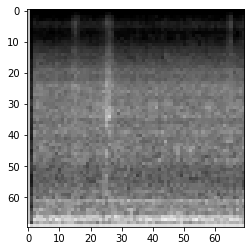

In [ ]:
plt.imshow(normalized_image, cmap="gray")

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [ ]:
def sound_to_img(wav_file_name) :
  split_string = wav_file_name.split(".")
  png_file_name = split_string[0] + ".png"
  return png_file_name

In [ ]:
png_file_name = sound_to_img('100263-2-0-117.wav')
print(png_file_name)

100263-2-0-117.png


In [ ]:
images_l  = []
ClassIDs = []

for index, row in data_frame.iterrows():
  remainder = index%300
  if (index > 0 and remainder == 0) :
    print(f'index : {index}')
   
  slice_file_name = row['slice_file_name']
  classID = row['classID']
  png_file_name = sound_to_img(slice_file_name)

  file_path = '/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/resize_img/'+png_file_name

  ClassIDs.append(classID)

  images_l.append(normalized_image)

index : 300
index : 600
index : 900
index : 1200
index : 1500
index : 1800
index : 2100
index : 2400
index : 2700
index : 3000
index : 3300
index : 3600
index : 3900
index : 4200
index : 4500
index : 4800
index : 5100
index : 5400
index : 5700
index : 6000
index : 6300
index : 6600
index : 6900
index : 7200
index : 7500
index : 7800
index : 8100
index : 8400
index : 8700


In [ ]:
len(ClassIDs)

8732

In [ ]:
len(images_l)

8732

In [ ]:
df_image2 = pd.DataFrame()
df_image2["Image"] = images_l
df_image2["ClassId"] = ClassIDs
df_image2

,Image,ClassId
0,"[[76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",3
1,"[[76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2
2,"[[76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2
3,"[[76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2
4,"[[76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2
...,...,...
8727,"[[76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
8728,"[[76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
8729,"[[76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1
8730,"[[76, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1


In [ ]:
df_image2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Image    8732 non-null   object
 1   ClassId  8732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 136.6+ KB


In [ ]:
df_image2.to_csv('/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/UrbanSound_File_created/Image_All.csv',index=False)

In [ ]:
df_Image_All = pd.read_csv('/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/UrbanSound_File_created/Image_All.csv')

df_Image_All

,Image,ClassId
0,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...,3
1,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...,2
2,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...,2
3,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...,2
4,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...,2
...,...,...
8727,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...,1
8728,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...,1
8729,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...,1
8730,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...,1


In [ ]:
df_Image_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Image    8732 non-null   object
 1   ClassId  8732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 136.6+ KB


In [ ]:

X = df_Image_All.drop('ClassId',axis=1)
y = df_Image_All.loc[:,'ClassId']

In [ ]:
# Print the newly created DataFrame
X.head()

,Image
0,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...
1,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...
2,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...
3,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...
4,[[ 76 0 0 ... 0 0 0]\n [ 76 0 0 ...


In [ ]:
y

0       3
1       2
2       2
3       2
4       2
       ..
8727    1
8728    1
8729    1
8730    1
8731    1
Name: ClassId, Length: 8732, dtype: int64

In [ ]:
X_train, X_temporary ,y_train ,y_temporary = train_test_split(X,y,train_size=0.8)
X_val ,X_test ,y_val,y_test = train_test_split(X_temporary,y_temporary,train_size=0.5)

In [ ]:
print(f'Length of data set {len(X)}')
print(f'Length of train data set {len(X_train)}')
print(f'Length of validation data set {len(X_val)}')
print(f'Length of test data set {len(X_test)}')

Length of data set 8732
Length of train data set 6985
Length of validation data set 873
Length of test data set 874


In [ ]:
print(f'Length of data set {len(y)}')
print(f'Length of train data set {len(y_train)}')
print(f'Length of validation data set {len(y_val)}')
print(f'Length of test data set {len(y_test)}')

Length of data set 8732
Length of train data set 6985
Length of validation data set 873
Length of test data set 874


In [ ]:
X_train.to_csv('/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/UrbanSound_File_created/Image_X_train.csv',index=False)
X_val.to_csv('/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/UrbanSound_File_created/Image_X_val.csv',index=False)
X_test.to_csv('/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/UrbanSound_File_created/Image_X_test.csv',index=False)

y_train.to_csv('/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/UrbanSound_File_created/Image_y_train.csv',index=False)
y_val.to_csv('/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/UrbanSound_File_created/Image_y_val.csv',index=False)
y_test.to_csv('/content/drive/MyDrive/AI_isleri/AI_Colab_UrbanSoundsClassificaiton/Proje_Spektrum-07-10-2022/preprocessing site/UrbanSound_File_created/Image_y_test.csv',index=False)